# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [3]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model, set_random_seed
from torchviz import make_dot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.config.experimental import enable_op_determinism
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

2024-10-15 11:03:04.853040: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-15 11:03:04.880113: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 11:03:04.910667: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 11:03:04.919887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 11:03:04.941739: I tensorflow/core/platform/cpu_feature_guar

In [4]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

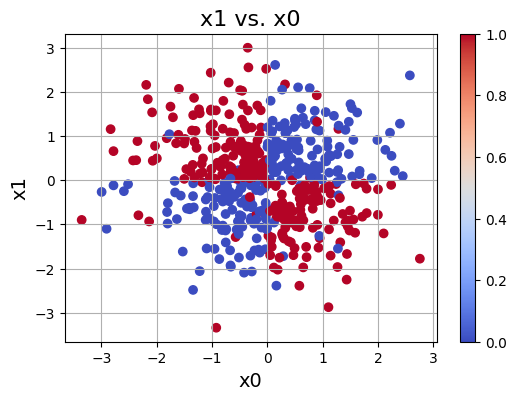

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()

In [6]:
# Learning rate scheduler
def lr_schedule(epoch, initial_lr=0.04, warmup_epochs=5, total_epochs=50):
    if epoch < warmup_epochs:
        # Warmup phase
        lr = (initial_lr / warmup_epochs) * (epoch + 1)
    else:
        # Cosine decay phase
        decay_epochs = total_epochs - warmup_epochs
        cosine_decay = 0.5 * (1 + np.cos(np.pi * (epoch - warmup_epochs) / decay_epochs))
        lr = initial_lr * cosine_decay
    return lr

Epoch 1/100


2024-10-15 11:03:13.112612: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6826 - loss: 0.6805 - val_accuracy: 0.7200 - val_loss: 0.6805 - learning_rate: 0.0020
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6437 - loss: 0.6771 - val_accuracy: 0.6700 - val_loss: 0.6752 - learning_rate: 0.0040
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6220 - loss: 0.6707 - val_accuracy: 0.6600 - val_loss: 0.6674 - learning_rate: 0.0060
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6215 - loss: 0.6618 - val_accuracy: 0.7100 - val_loss: 0.6578 - learning_rate: 0.0080
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.6511 - val_accuracy: 0.7400 - val_loss: 0.6464 - learning_rate: 0.0100
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7801 - loss: 0.6386 - val_accuracy: 0.7600 - val_loss: 0.6332 - learning_rate: 0.0120
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.6249 - val_accuracy: 0.77

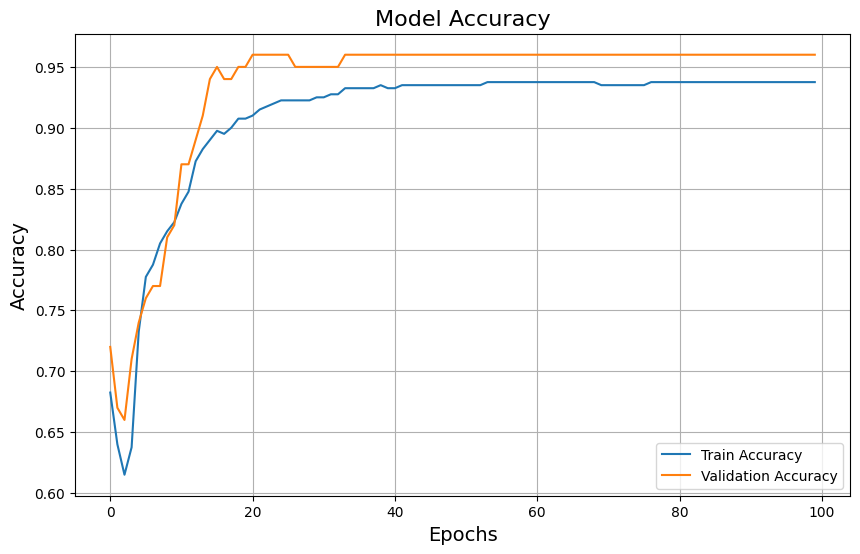

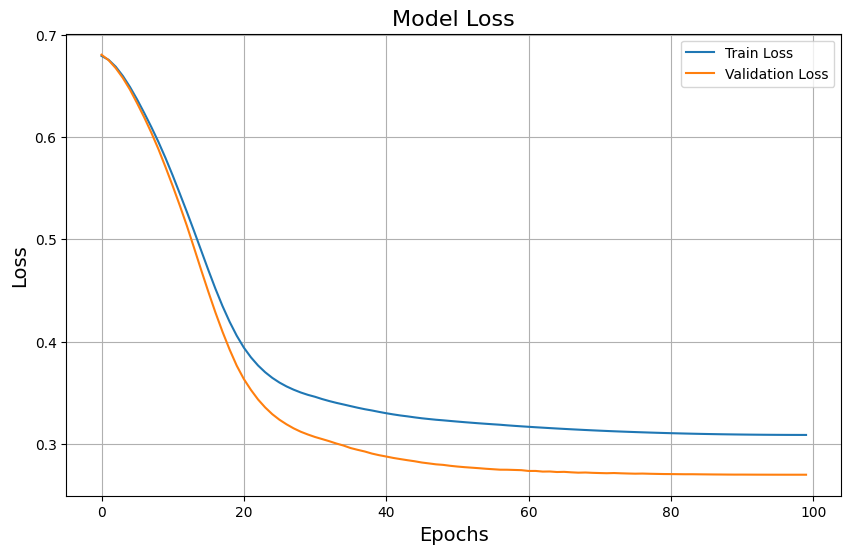

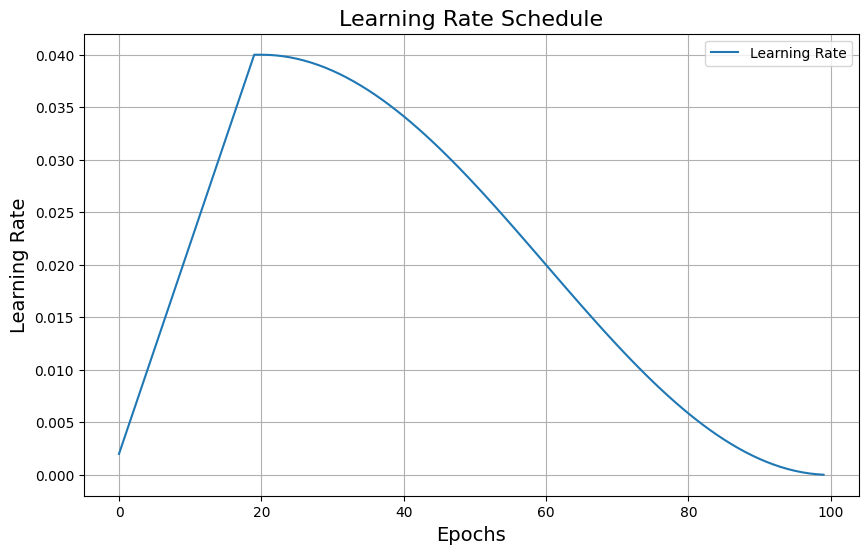

In [7]:
np.random.seed(42)
set_seed(42)
set_random_seed(42)
enable_op_determinism()

train, val = train_test_split(train, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(train[['x0', 'x1']], train['y'], stratify=train['y'], random_state=42)

x_train = train[['x0', 'x1']]
y_train = train['y']
x_val = val[['x0', 'x1']]
y_val = val['y']
x_test = test[['x0', 'x1']]
y_test = test['y']

model = Sequential(
    [
        Dense(10, activation='relu', name='layer1'),
        Dense(6, activation='relu', name='layer2'),
        Dense(1, activation='sigmoid', name='output')
    ]
)

model.compile(
    optimizer = SGD(learning_rate=0.04),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# Schedule learning rate
total_epochs = 100

lr_scheduler = LearningRateScheduler(lambda epoch: lr_schedule(epoch, initial_lr=0.04, warmup_epochs=20, total_epochs=total_epochs))

history = model.fit(
    x_train,
    y_train,
    batch_size = 16,
    epochs = total_epochs,
    validation_data = (x_val, y_val),
    callbacks = [lr_scheduler]
)

train_prediction = (model.predict(x_train) > 0.5).astype(int)
test_prediction = (model.predict(x_test) > 0.5).astype(int)

train_accuracy = accuracy_score(y_train, train_prediction)
test_accuracy = accuracy_score(y_test, test_prediction)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

# history.history
# model.layers
# model.weights
# model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Model Loss', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['learning_rate'], label='Learning Rate')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Learning Rate', fontsize=14)
plt.title('Learning Rate Schedule', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Discussion - Mission 2.1
    - How did you achieve the reproducibility of the results?
    I started using Adam as an optimizer for my neural network. The accuracy results varied a lot, and it was not reproducable. I switched optimizer to SGD, and this made a much more stable accuracy. After increasing the number of layers I also managed to make the results from Adam more stable. This made it possible to every time achive accuracy over 0.92. Before this, I also tweaked the number of nodes in the hidden layers, the number of epochs and the learning rate value.

    - Visualize the network's architecture and decision boundary.
    The networks architecture can be found below. The decision boundary has also been plotted below this image.

    - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
    I chose to use Adam. This worked better to get a stable result when I added more layers. Adam converges faster than SGD. SGD uses less memory, but it struggles when the data is noisy. Adam is more robust to changes in hyperparameters than SGD. SGD also tends to be really sensitive to change in learning rate.

    - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
    The learning rate dynamics can be found above. It linearly increases the learing rate in the start and has a cosine deacay after reaching the specified warm-up epoches. It performs significantly worse without this scheduler (accuracy ~0.88). The warm-up phase helps the model start with small updates, avoiding large changes early in training. The cosine decay reduces the learning rate gradually. This way the model can fine-tune the weights without overshooting.

    - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.

\begin{array}{|l|c|}
\hline
\textbf{Removed component}         & \textbf{Test Accuracy} \\
\hline
No Learning Rate Scheduler         & 0.88                   \\
Replace ReLU with Tanh             & 0.86                   \\
Use SGD Optimizer                  & 0.90                   \\
Batch Size 32                      & 0.89                   \\
Learning Rate 0.001                & 0.89                   \\
Epochs 50                          & 0.89                   \\
\hline
\end{array}


    

#### Network architecture:
![NETWORK ARCHITECTURE](model.png)

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


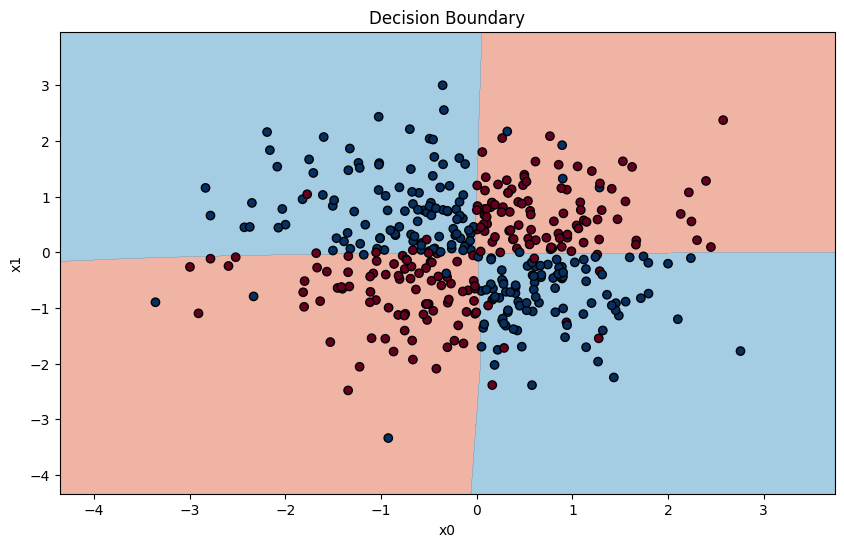

In [8]:
# Generate a grid of points
x_min, x_max = x_train['x0'].min() - 1, x_train['x0'].max() + 1
y_min, y_max = x_train['x1'].min() - 1, x_train['x1'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten the grid to pass through the model
grid = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(grid).reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)

# Plot the training data
plt.scatter(x_train['x0'], x_train['x1'], c=y_train, cmap="RdBu", edgecolors='k')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Decision Boundary')
plt.show()

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [9]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [10]:
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [11]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


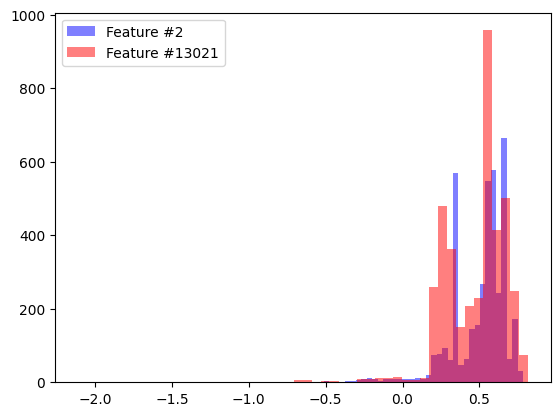

In [12]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

In [13]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,1
1,1,3
2,2,1
3,3,3
4,4,0
...,...,...
3995,3995,2
3996,3996,2
3997,3997,1
3998,3998,3


/tmp/ipykernel_14051/1504881321.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


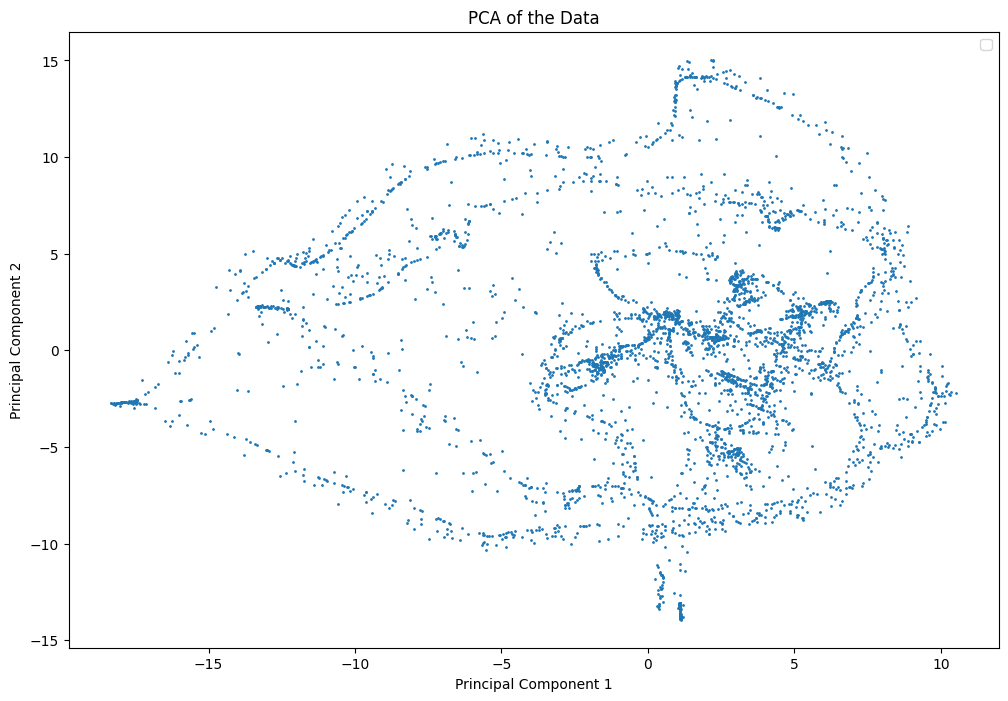

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = data.iloc[:, 1:]
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))  # Adjust the figsize to make the plot larger
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Data')
plt.legend()
plt.show()

/home/ksund/Documents/ntnu/intro_ml/Assignments/machinepy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ksund/Documents/ntnu/intro_ml/Assignments/machinepy/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/tmp/ipykernel_14051/1855936265.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


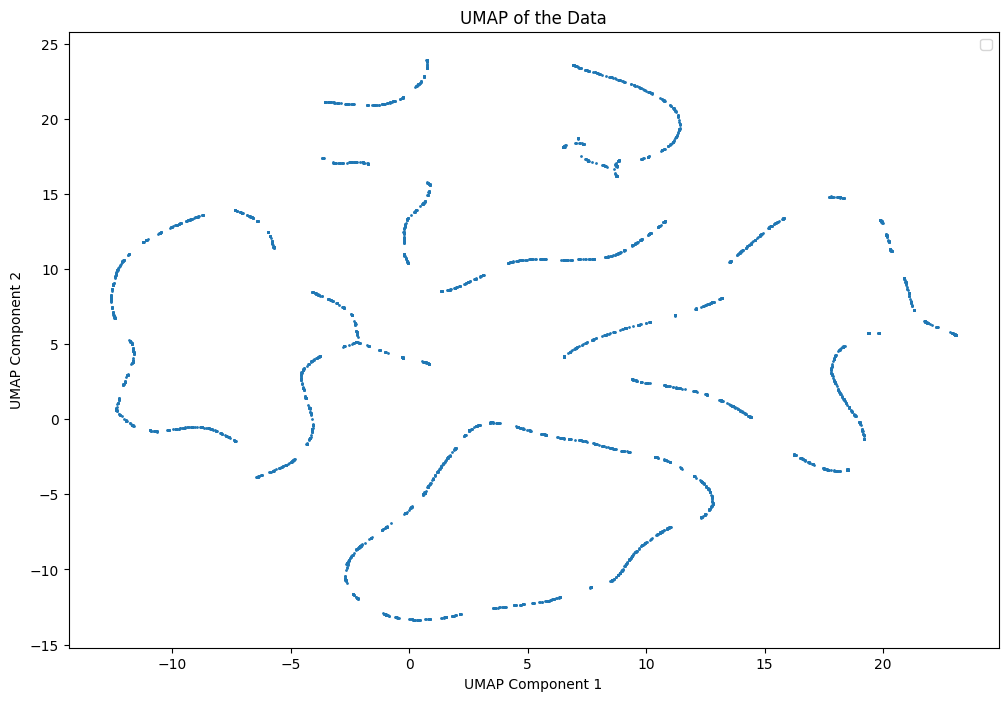

In [15]:
from umap import UMAP

umap_model = UMAP(n_neighbors=10, min_dist=0, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=1)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of the Data')
plt.legend()
plt.show()

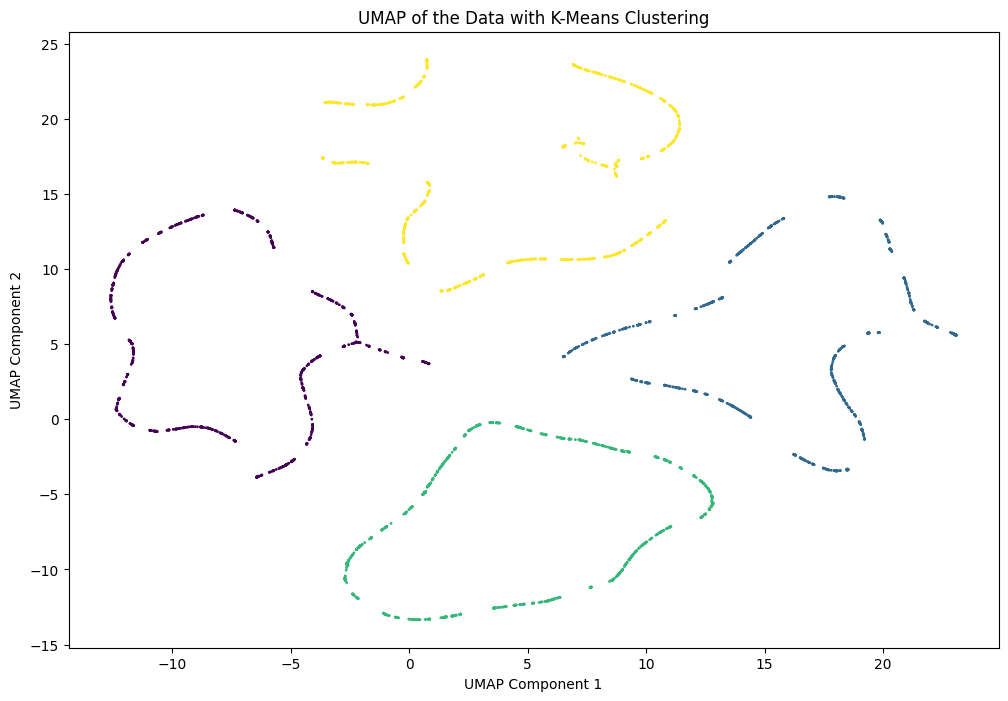

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_umap)

submission_df = pd.DataFrame({
    'ID': data['ID'],
    'cluster': clusters
})
submission_df.to_csv('sample_submission.csv', index=False)

plt.figure(figsize=(12, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis', s=1)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of the Data with K-Means Clustering')
# plt.colorbar(label='Cluster')
plt.show()

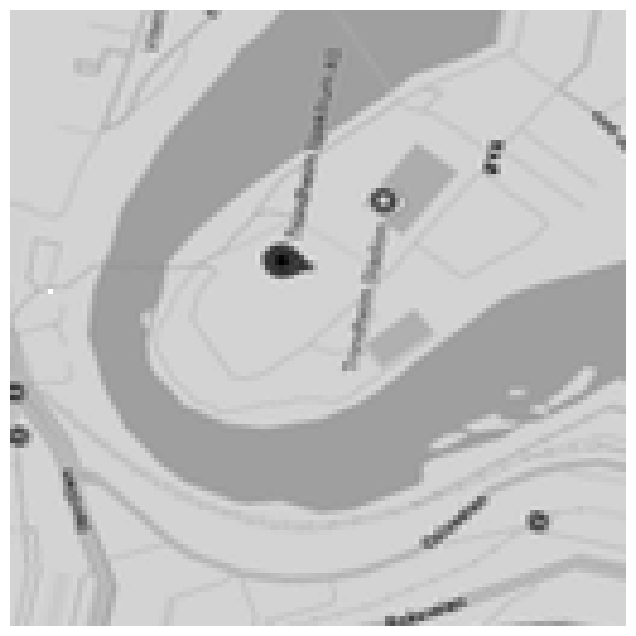

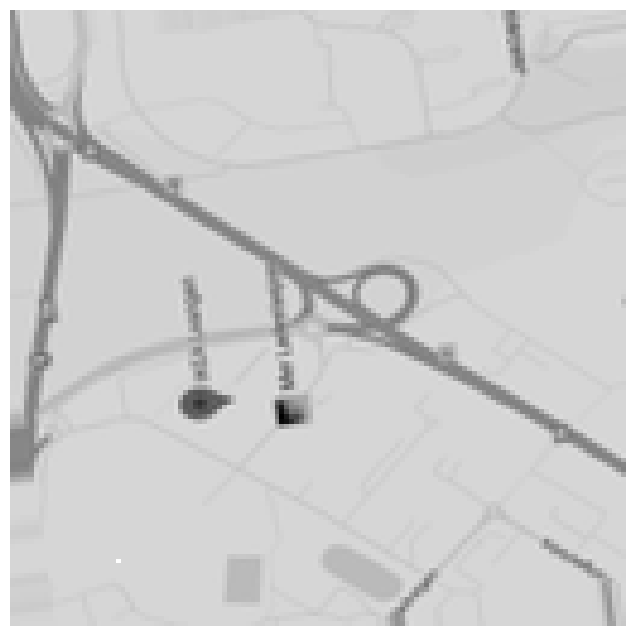

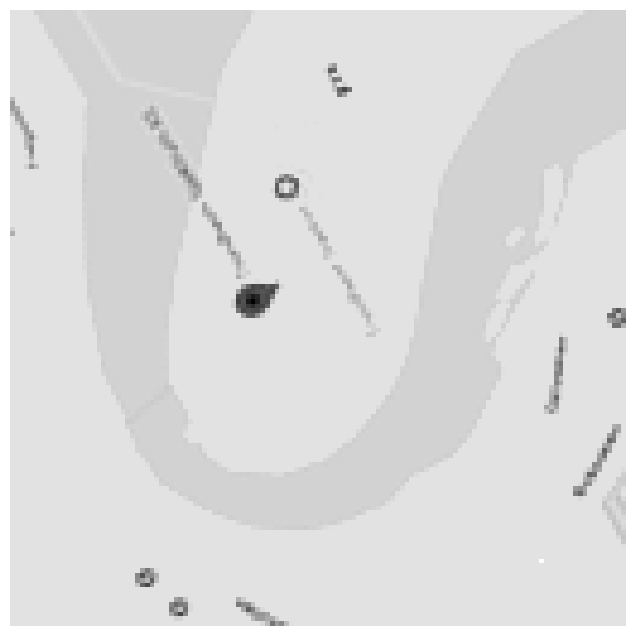

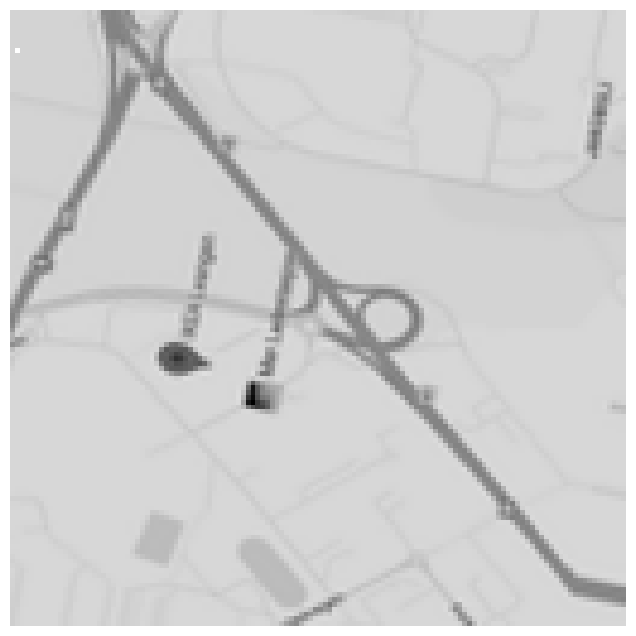

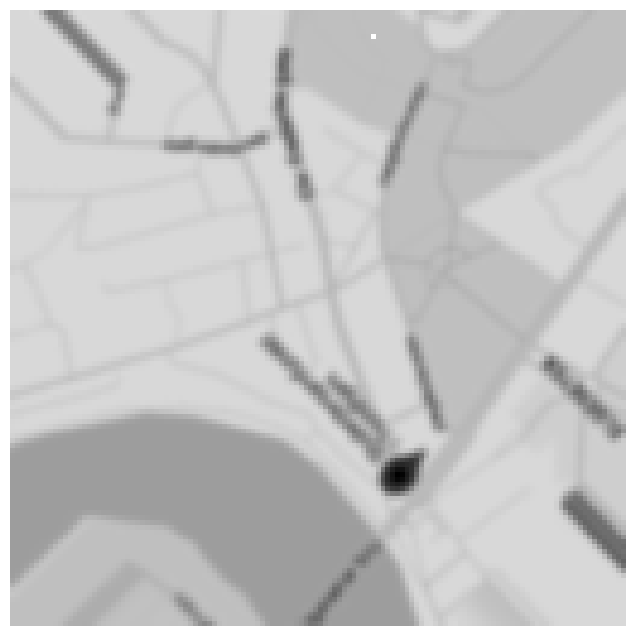

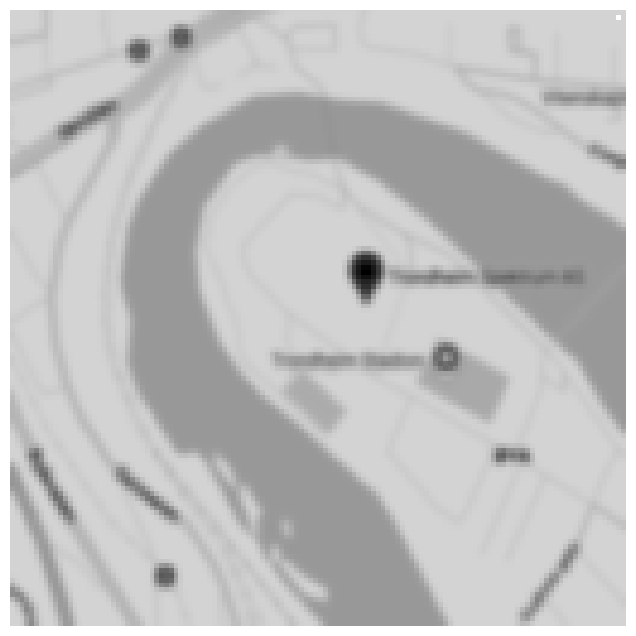

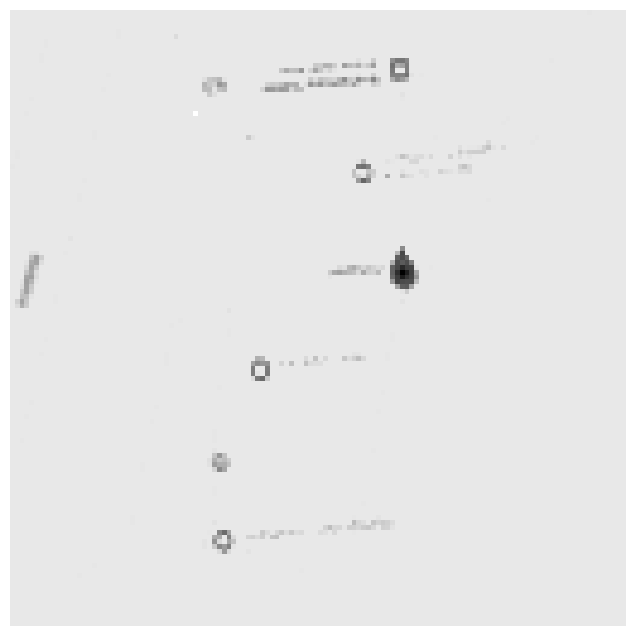

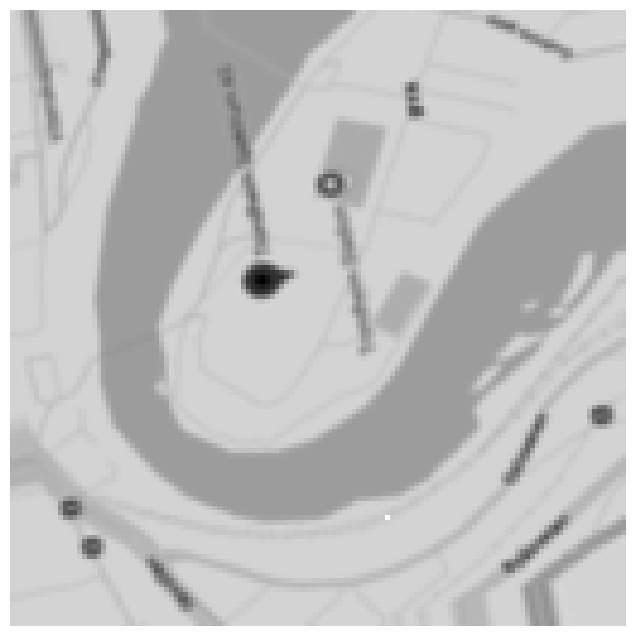

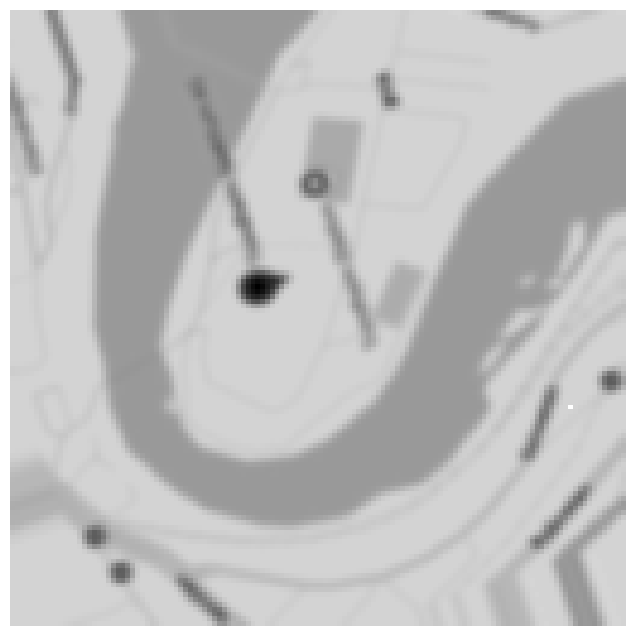

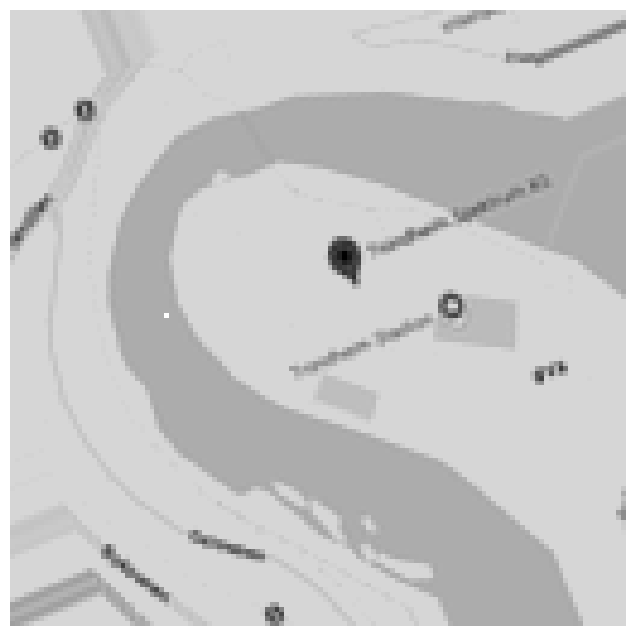

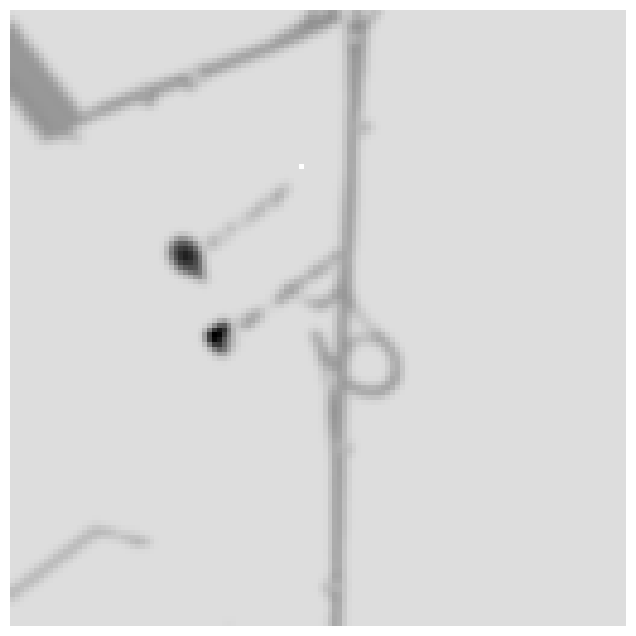

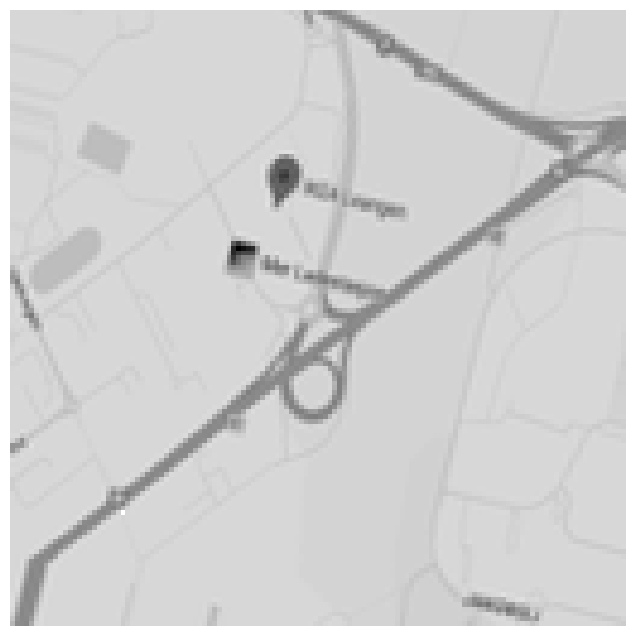

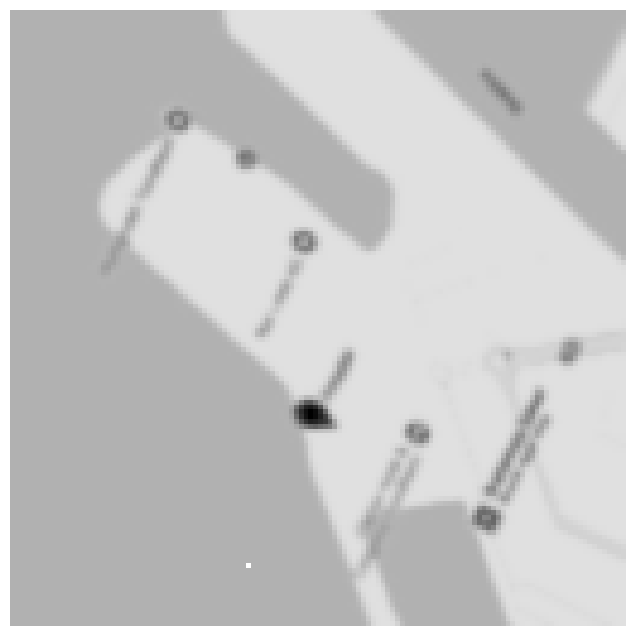

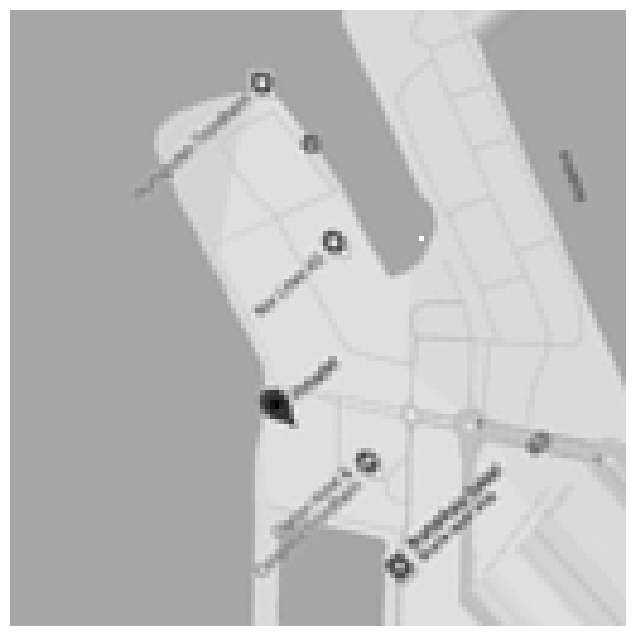

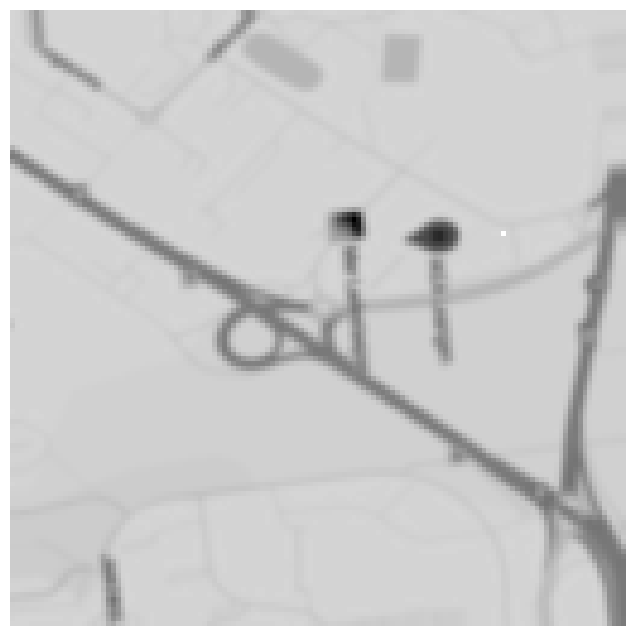

In [24]:
data2 = pd.read_csv('unsupervised_data.csv')
reordered_data = sorted(data2.columns, key=lambda x: int(x.split('_')[1]))
data2 = data2.reindex(reordered_data, axis=1)
reshaped_data = data2.values.reshape(-1, 128, 128)

for i in range(15):
    plt.figure(figsize=(12, 8))
    plt.imshow(reshaped_data[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [23]:
print("1. Trondheim spektrum: N 63° 25.625' E 010° 22.635'")
print("2. Ikea Leangen: N 63° 25.730' E 010° 28.380'")
print("3. Studentersamfundet: N 63° 25.350' E 010° 23.700'")
print("4. Gløshaugen: N 63° 26.445' E 010° 24.055'")

1. Trondheim spektrum: N 63° 25.625' E 010° 22.635'
2. Ikea Leangen: N 63° 25.730' E 010° 28.380'
3. Studentersamfundet: N 63° 25.350' E 010° 23.700'
4. Gløshaugen: N 63° 26.445' E 010° 24.055'



---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [111]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [112]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

1.0

In [113]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.3333333333333333

In [114]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

0.5